### Question1

Because the growth of species 2 is dependent upon the consumption of species 1 we have: $Y1 + Y2\rightarrow 2Y2$. Thus, $Y2$ would be the predator and $Y1$ the prey. 

Corresponding DEs:
$$\frac{dY1}{dt} = C1Y1 - C2Y1Y2 $$
<br>
<br>

$$\frac{dY2}{dt} = -C3Y2 + C2Y1Y2 $$


In abscence of species 2, species 1 would grow exponentially and therefore can live in isolation. However, the existence of species 2 is completely dependent upon species 1 and thus it cannot survive isolation.


Reactions and their corresponding rates are as follows:

$Y1 \rightarrow Y1 +1$ $\;\;\;\;\;\;$  $C1Y1 $ 

$Y2 +Y1 \rightarrow Y2 +1$ $\;\;\;\;\;\;$  $C2Y1Y2$ 

$Y2 \rightarrow Y2 -1$ $\;\;\;\;\;\;$  $C3Y2$



In [9]:
import numpy as np
import matplotlib.pyplot as plt 
import math
import random
from numba import jit

events = [
(+1,0),
(-1,+1),
(0,-1)]
events = np.asarray(events)

@jit(nopython=True)
def Gillespie(size,maxtime,C1,C2,C3):
    ns = 0
    time = 0
    no_events = np.arange(0,3,1)
    t = np.zeros(size)
    v = np.zeros((size, 2))
    v[(0, 0)] =y1
    v[(0, 1)] =y2
 
    while time <= maxtime:
           
        rates = np.array([C1*v[(ns, 0)], C2*v[(ns, 0)]*v[(ns, 1)],C3*v[(ns, 1)] ])

    
        total_rate  =  np.sum(rates)

        dt = -math.log(1 - random.uniform(0.0, 1.0)) / total_rate 

        choose = np.searchsorted(np.cumsum(rates/total_rate), np.random.rand(1))[0]
        time = time +dt
        t[ns+1]= t[ns]+dt
        v[ns+1] = v[ns]+events[choose]
        ns = ns + 1
        if ns == size-1:
            break
        if np.all((v[ns]==0)==True):
            break

    return t[0:ns], v[0:ns]

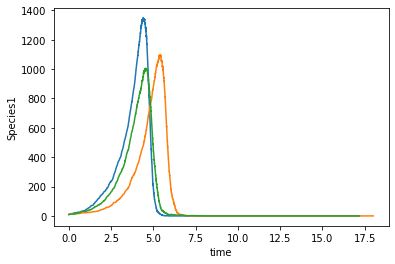

In [12]:
y1 = 10
y2 = 10
for i in range(3):
    t,v = Gillespie(size = 100000,maxtime = 1000000,C1=1 , C2 = 0.005,C3 = 0.6)
    plt.plot(t,v[:,[0]]);
plt.ylabel("Species1")
plt.xlabel("time");

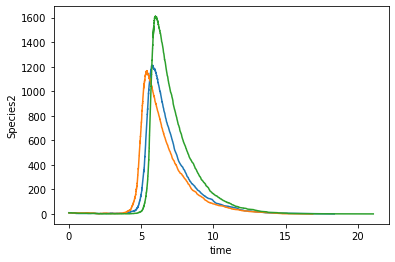

In [16]:
for i in range(3):
    t,v = Gillespie(size = 100000,maxtime = 3000,C1=1 , C2 = 0.005,C3 = 0.6)
    plt.plot(t,v[:,[1]]);
plt.ylabel("Species2")
plt.xlabel("time");

#### Increasing the rate of predation (C2) must dicrease the extinction time for  species1

In [8]:
import numpy as np
import matplotlib.pyplot as plt 
import math
import random
from numba import jit

events = [
(+1,0),
(-1,+1),
(0,-1)]
events = np.asarray(events)

@jit(nopython=True)
def Extinction_time(nostep,species1,species2,C1,C2,C3):
    time = 0
    no_events = np.arange(0,3,1)
    t = np.zeros(nostep)
    v = np.zeros((nostep, 2))
    v[(0, 0)] =y1
    v[(0, 1)] =y2
 
    for z in range(nostep-1):
        if np.all((v[z]==0)==True):
            break
           
        rates = np.array([C1*v[(z, 0)], C2*v[(z, 0)]*v[(z, 1)],C3*v[(z, 1)] ])

    
        total_rate  =  np.sum(rates)

        dt = -math.log(1 - random.uniform(0.0, 1.0)) / total_rate 

        choose = np.searchsorted(np.cumsum(rates/total_rate), np.random.rand(1))[0]
        time = time +dt
        t[z+1]= t[z]+dt
        v[z+1] = v[z]+events[choose]

        if species1:
            if v[(z, 0)] ==0:
                return time
                break
        if species2:
            if v[(z, 1)] ==0:
                return time
                break
            

In [27]:
C22= np.arange(0.001,1,0.001)
y1 = 10
y2 = 10
t_extinct =np.zeros(100)
t_extinct_ave =np.zeros(len(C22))
for i in range(len(C22)):
    for j in range(100):
        t_extinct[j] = Extinction_time(100000,species1=True,species2=False,C1=1,C2=C22[i],C3 = 0.6)
    t_extinct_ave[i]=np.mean(t_extinct[np.logical_not(np.isnan(t_extinct))])

    

        

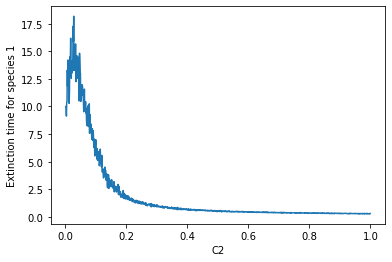

In [28]:
plt.plot(C22,t_extinct_ave);
plt.ylabel("Extinction time for species 1")
plt.xlabel("C2");

#### Increasing the the rate of death (C3) would result in a faster extinction of species2

In [23]:
C33 = np.arange(10,100,0.1)
y1 = 10
y2 = 10
t_extinct =np.zeros(100)
t_extinct_ave =np.zeros(len(C33))
for i in range(len(C33)):
    for j in range(100):
        t_extinct[j] = Extinction_time(100000,C1=1,species1=False,species2=True,C2=0.005,C3 = C33[i])
    t_extinct_ave[i]=np.mean(t_extinct[np.logical_not(np.isnan(t_extinct))])


    

        

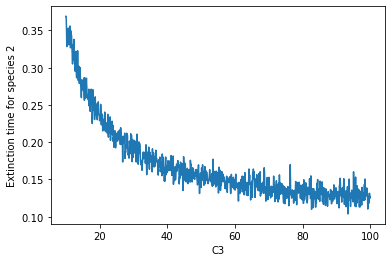

In [26]:
plt.plot(C33,t_extinct_ave);
plt.ylabel("Extinction time for species 2")
plt.xlabel("C3");

### Question2

We solve for:
$$ 0 = k1 - \alpha_1X - k_aXY$$
<br>
$$ 0 = k1 - \alpha_2Y - k_aXY$$

Given:
$$k =10, \alpha_1 =10^{-6} , \alpha_2 = 10^{-5}, k_a = 10^{-5}$$
<br>
Or:
<br>
$$k =10^{3}, \alpha_1 =10^{-4} , \alpha_2 = 10^{-3}, k_a = 10^{-3}$$

For both cases the equilibrium points are:

$${X_1 = -3162.78, Y_1 = -316.278}$$
<br>
$${X_2 = 3161.78, Y_2 = 316.178}$$

Since the equations are written for chemical reactions, only the second set of values are acceptable. 


Reactions and their corresponding rates are as follows:

$X \rightarrow X +1$ $\;\;\;\;\;\;$  $k$ 

$X \rightarrow X -1$ $\;\;\;\;\;\;$  $\alpha_1X$

$Y \rightarrow Y +1$ $\;\;\;\;\;\;$  $k$

$Y \rightarrow Y -1$ $\;\;\;\;\;\;$  $\alpha_2Y$

$Y +X \rightarrow Y -1,X-1$ $\;\;\;\;\;\;$  $k_aXY$

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import math
import random
from numba import jit
import numba as nb
events = [
(+1,+1),
(-1,0),
(0,-1),
(-1,-1)]
events = np.asarray(events)
no_events = np.arange(0,4,1)

@jit(nopython=True)
def Gillespie2(size,maxtime,k,a1,a2,ka,X,Y):
    ns = 0
    time = 0
    t = np.zeros(size)
    v = np.zeros((size, 2))
    v[(0, 0)] =X
    v[(0, 1)] =Y
    while time <= maxtime:         
        rates = np.array([k,  a1*v[(ns, 0)], a2*v[(ns, 1)],  ka*v[(ns, 0)]*v[(ns, 1)]])
        total_rate  =  np.sum(rates)
        dt = -math.log(1 - random.uniform(0.0, 1.0)) / total_rate 
        choose = np.searchsorted(np.cumsum(rates/total_rate), np.random.rand(1))[0]
        time   = time+dt
        t[ns+1]= t[ns]+dt
        v[ns+1]= v[ns]+events[choose]
        ns = ns + 1
        if ns == size-1:
            break
        if np.all((v[ns]==0)==True):
            break

    return t[0:ns], v[0:ns]

In [2]:
t,v = Gillespie2(size = 50000000,maxtime = 2000000,k =10,a1 =10**-6,a2 =10**-5,ka =10**-5,X = 1000,Y = 100)

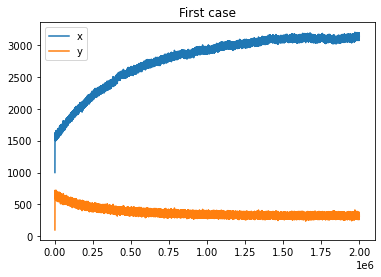

In [3]:

plt.plot(t,v[:,[0]]);
plt.plot(t,v[:,[1]]);
plt.title('First case')
plt.legend(['x','y']);

In [4]:
t2,v2 = Gillespie2(size = 50000000,maxtime =2000000,k =10**3,a1 =10**-4,a2 =10**-3,ka =10**-3,X = 1000,Y = 100)

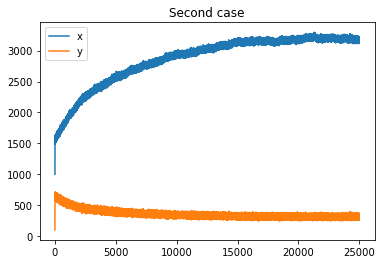

In [5]:
plt.plot(t2,v2[:,[0]]);
plt.plot(t2,v2[:,[1]]);
plt.legend(['x','y'])
plt.title('Second case');

For the second case convergence to stationary distribution is much faster than the first. The higher rate of production of X and Y and a lower degradation rate in the second case allow for the faster convergence.

### Question3

Master equation:
<br>
<br>
<br>
$$\frac{dP(r,p,t)}{dt} =  [k_l + \phi(p)]  P(r-1,p,t) -   [k_l + \phi(p)] P(r,p,t) +\gamma_r (r+1)P(r+1,p,t) -\gamma_r (r)P(r,p,t)+ r k_p P(r,p-1,t) - r k_p P(r,p,t)+\gamma_p (p+1) P(r,p+1,t) - \gamma_pp P(r,p,t)$$

$TM = \begin{pmatrix} [1-(\gamma_rr+rk_p)]\delta t & \gamma_rr \delta t & rk_p \delta t \\ (k_l + \phi(p))\delta t & [1-(k_l + \phi(p))]\delta t & 0 \\ \gamma_pp \delta t & 0 & (1- \gamma_pp)\delta t  \end{pmatrix}$

Finding the equilibrium points:
$$ 0 = k_l + \phi(p) - \gamma_r r$$
<br>
$$ 0 = r k_p - \gamma_p p$$

Positive autoregulation:  $$\phi(p) = \frac{k_0 ({\frac{p}{k}})^n}{1+({\frac{p}{k}})^n}$$


For $k_l = 0; k_0 = 1; k = 0.5; n = 1; \gamma_r = 1; k_p = 1; \gamma_p = 1$ 

or for $k_l = 0; k_0 = 1; k = 0.5; n = 10; \gamma_r = 1; k_p = 1; \gamma_p = 1$

Equilibrium points: $\{r =0, p = 0\}$ and $\{r = 0,5 , p =0.5\}$

For the first set of parameters (n=1) eigenvalues are:

$\{-2.41421, 0.414214\}$ , $\{-1.70711, -0.292893\}$ for $\{r =0, p = 0\}$ and $\{r = 0,5 , p =0.5\}$ respectively.

Therefore given n=1, $\{r = 0,5 , p =0.5\}$  is an stable equilibrium and $\{r =0, p = 0\}$ is an unstable one.

For n=10 eigenvalues are:

$\{-1., -1.\}$ and $\{-3.23607, 1.23607\}$ for $\{r =0, p = 0\}$ and $\{r = 0,5 , p =0.5\}$ respectively. 

Therefore given n=10, $\{r = 0,5 , p =0.5\}$  is an unstable equilibrium and $\{r =0, p = 0\}$ is an stable one.

Reactions and their corresponding rates:

$r \rightarrow r +1$ $\;\;\;\;\;\;$  $k_l + \phi(p)$ 

$r \rightarrow r -1$ $\;\;\;\;\;\;$  $\gamma_r r$

$p \rightarrow p +1$ $\;\;\;\;\;\;$  $r k_p$

$p \rightarrow p -1$ $\;\;\;\;\;\;$  $\gamma_p p$

In [15]:
import numpy as np
import matplotlib.pyplot as plt 
import math
import random
from numba import jit
import numba as nb
events = [
(+1,0),
(-1,0),
(0,+1),
(0,-1)]

events = np.asarray(events)
@jit(nopython=True)
def Gillespie3(size,maxtime,kl,kp,k0,yp,yr,n,k,r1,p1):
    ns = 0
    time = 0
    no_events = np.arange(0,4,1)
    t = np.zeros(size)
    v = np.zeros((size, 2))
    v[(0, 0)] =r1
    v[(0, 1)] =p1
    
 
    while time <= maxtime:
           
        rates = np.array([kl + (k0/(1+((v[(ns, 1)]/k)**n))), yr*v[(ns, 0)], kp*v[(ns, 0)], yp*v[(ns, 1)]])

    
        total_rate  =  np.sum(rates)

        dt = -math.log(1 - random.uniform(0.0, 1.0)) / total_rate 

        choose = np.searchsorted(np.cumsum(rates/total_rate), np.random.rand(1))[0]
        time = time +dt
        t[ns+1]= t[ns]+dt
        v[ns+1] = v[ns]+events[choose]
        ns = ns + 1
        if ns == size-1:
            break
        if np.all((v[ns]==0)==True):
            break

    return t[0:ns], v[0:ns]

In [80]:
#Strong regulation

t,v = Gillespie3(size = 100000000,maxtime =10000000,kl = 0.001,kp = 0.17,k0 = 0.01,yp = 0.00028,yr = 0.0083,n  = 10,k  = 100,r1 = 10,p1=10)


Coefficient of variation in case of strong regulation for RNA: 0.9346770213999236
Coefficient of variation in case of strong regulation for Protein: 0.2323132350142058


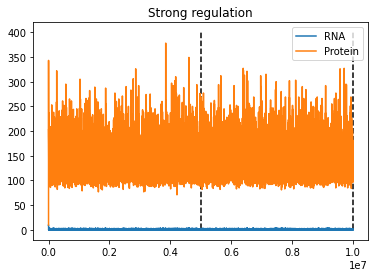

In [81]:
import pandas as pd
from math import isclose

plt.plot(t,v[:,[0]]);
plt.plot(t,v[:,[1]]);
plt.title('Strong regulation')
plt.legend(['RNA','Protein']);
plt.vlines(t[round(len(t)/2)], 1, 400,linestyles='dashed')
plt.vlines(t[len(t)-1], 1, 400,linestyles='dashed')

#Sampling the stationary distribution after a burn-in period (t_burn = t/2)

RNA_stationary = v[:,[0]][round(len(t)/2):len(t)-1]
Pro_stationary = v[:,[1]][round(len(t)/2):len(t)-1]

coeff_var_RNA = np.std(RNA_stationary)/np.mean(RNA_stationary)
coeff_var_Pro = np.std(Pro_stationary)/np.mean(Pro_stationary)

print('Coefficient of variation in case of strong regulation for RNA:', coeff_var_RNA)
print('Coefficient of variation in case of strong regulation for Protein:', coeff_var_Pro)

In [71]:
t2,v2 = Gillespie3(size = 10000000,maxtime = 10000000,kl = 0.001,kp = 0.17,k0 = 0.01,yp = 0.00028,yr = 0.0083,n  = 10,k = 10000,r1 = 10,p1=10)

Coefficient of variation in case of weak regulation for RNA: 0.6770296845867734
Coefficient of variation in case of weak regulation for Protein: 0.15613103404724846


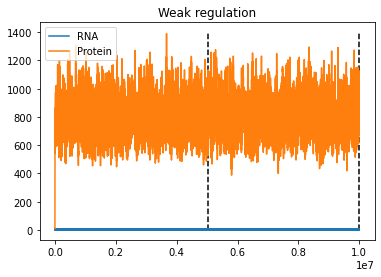

In [76]:
plt.plot(t2,v2[:,[0]]);
plt.plot(t2,v2[:,[1]]);
plt.title('Weak regulation');
plt.legend(['RNA','Protein']);
plt.vlines(t2[round(len(t2)/2)], 1, 1400,linestyles='dashed');
plt.vlines(t2[len(t2)-1], 1, 1400,linestyles='dashed');

#Sampling the stationary distribution after a burn-in period (t_burn = t/2)

RNA_stationary = v2[:,[0]][round(len(t2)/2):len(t2)-1]
Pro_stationary = v2[:,[1]][round(len(t2)/2):len(t2)-1]

coeff_var_RNA = np.std(RNA_stationary)/np.mean(RNA_stationary)
coeff_var_Pro = np.std(Pro_stationary)/np.mean(Pro_stationary)

print('Coefficient of variation in case of weak regulation for RNA:', coeff_var_RNA)
print('Coefficient of variation in case of weak regulation for Protein:', coeff_var_Pro)

import warnings
warnings.filterwarnings("ignore")